In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from utils import trend, seasonality, noise, plot_series

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
time = np.arange(4 * 365 + 1, dtype="float32")

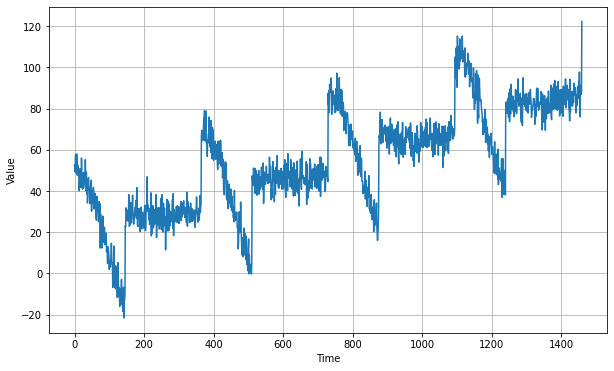

In [3]:
baseline = 10
slope = 0.05
amplitude = 40
noise_level = 5

series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude) + noise(time, noise_level, seed=42)
plot_series(time, series)

In [4]:
split_time = 1000

time_train = time[:split_time]
x_train = series[:split_time]
time_val = time[split_time:]
x_val = series[split_time:]

In [5]:
def evaluate(true_value, forecast):
    mse = keras.metrics.mean_squared_error(true_value, forecast).numpy()
    mae = keras.metrics.mean_absolute_error(true_value, forecast).numpy()
    print(f"mse = {mse:.4f}, mae = {mae:.4f}")

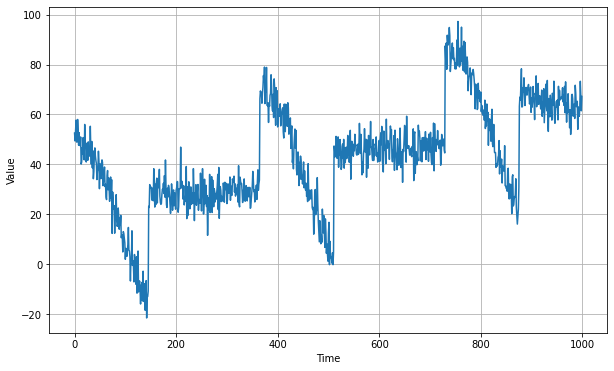

In [6]:
plot_series(time_train, x_train)

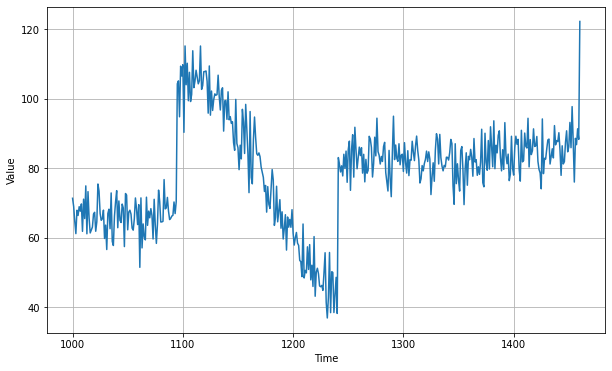

In [7]:
plot_series(time_val, x_val)

In [8]:
naive_forecast = series[split_time - 1:-1]
evaluate(x_val, naive_forecast)

mse = 61.8275, mae = 5.9379


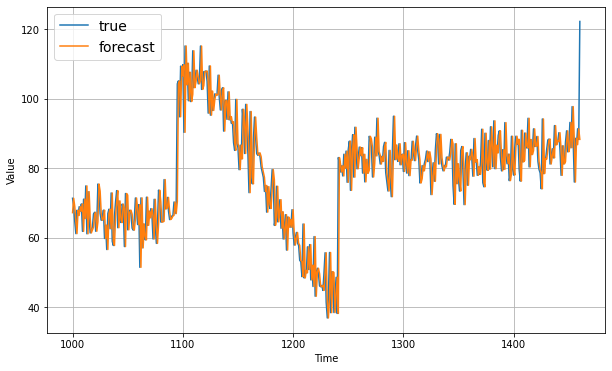

In [9]:
plot_series(time_val, [x_val, naive_forecast], label=['true', 'forecast'])

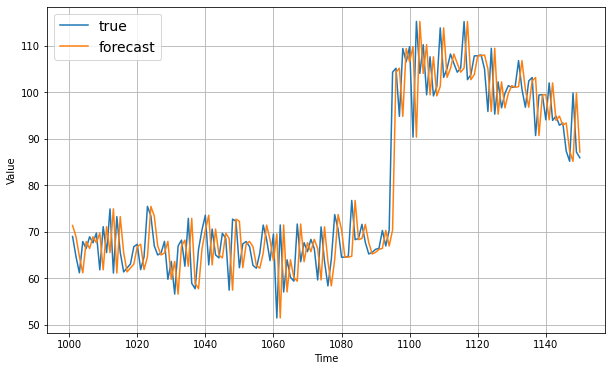

In [10]:
plot_series(time_val, [x_val, naive_forecast], label=['true', 'forecast'], start=1, end=151)

In [11]:
def moving_average_forecast(series, window_size):
  forecast = []
  for time in range(len(series) - window_size):
      forecast.append(series[time:time + window_size].mean())
  return np.array(forecast)

In [12]:
moving_avg = moving_average_forecast(series, 30)[split_time - 30:]
evaluate(x_val, moving_avg)

mse = 106.6746, mae = 7.1424


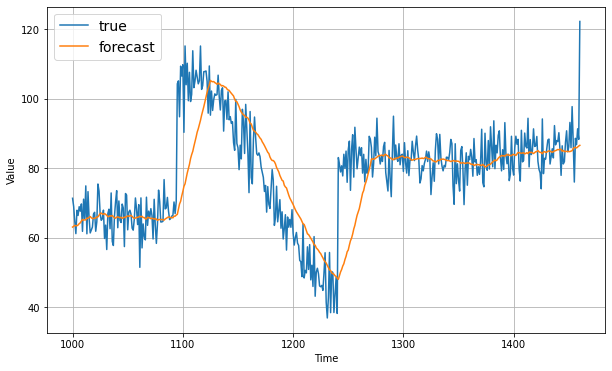

In [13]:
plot_series(time_val, [x_val, moving_avg], label=['true', 'forecast'])

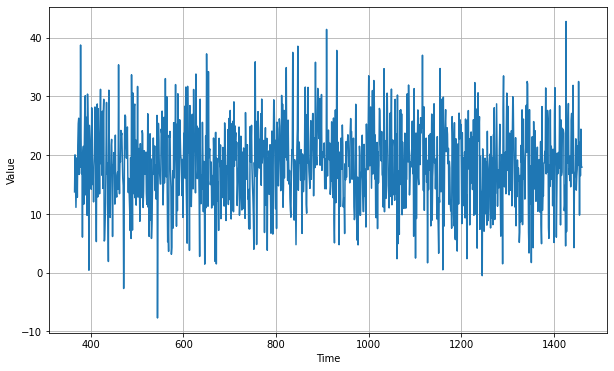

In [14]:
diff_series = (series[365:] - series[:-365])
diff_time = time[365:]

plot_series(diff_time, diff_series)

In [15]:
diff_moving_avg = moving_average_forecast(diff_series, 50)[split_time - 365 - 50:]

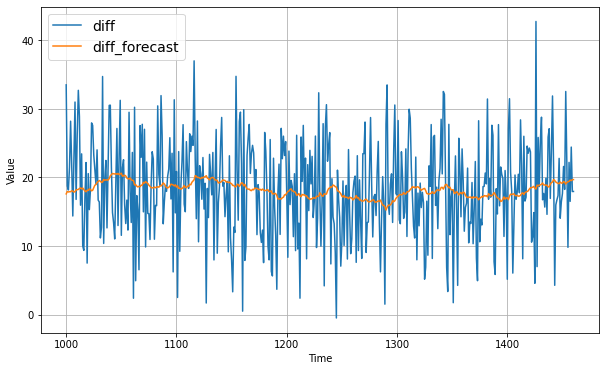

In [16]:
plot_series(time_val, [diff_series[split_time - 365:], diff_moving_avg], label=['diff', 'diff_forecast'])

In [17]:
diff_moving_avg_plus_past = series[split_time - 365:-365] + diff_moving_avg
evaluate(x_val, diff_moving_avg_plus_past)

mse = 52.9737, mae = 5.8393


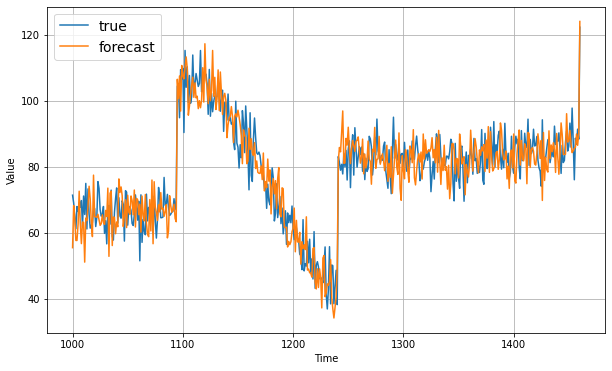

In [18]:
plot_series(time_val, [x_val, diff_moving_avg_plus_past], label=['true', 'forecast'])

In [19]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-360], 10) + diff_moving_avg
evaluate(x_val, diff_moving_avg_plus_smooth_past)

mse = 33.4523, mae = 4.5694


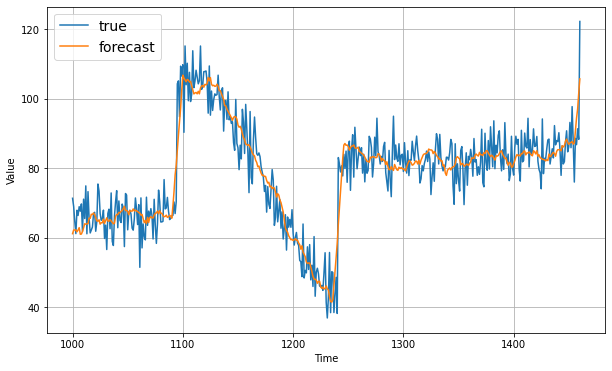

In [20]:
plot_series(time_val, [x_val, diff_moving_avg_plus_smooth_past], label=['true', 'forecast'])